<a href="https://colab.research.google.com/github/malak-elbanna/KNN-for-the-IRIS-dataset/blob/main/KNN_(sklearn_%2B_from_scratch)_IRIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

Load and Visualizing IRIS Dataset

In [ ]:
iris = load_iris()

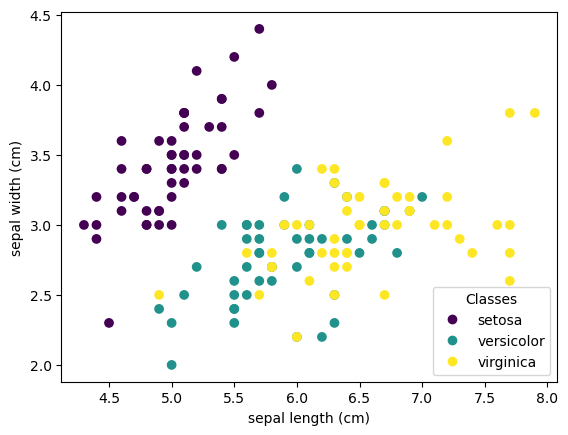

In [ ]:
_, ax = plt.subplots()
scatter = ax.scatter(iris.data[:, 0], iris.data[:, 1], c=iris.target)
ax.set(xlabel=iris.feature_names[0], ylabel=iris.feature_names[1])
_ = ax.legend(
    scatter.legend_elements()[0], iris.target_names, loc="lower right", title="Classes"
)

Converting to Pandas Dataframe

In [ ]:
iris_df = pd.DataFrame(data=np.c_[iris.data, iris.target], columns=iris.feature_names + ['target'])

Dataset Preprocessing and Cleaning

In [ ]:
iris_df.info

<bound method DataFrame.info of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8

In [ ]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
iris_df.describe

<bound method NDFrame.describe of      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1

In [ ]:
#check if dataset is balanced
iris_df["target"].value_counts()

0.0    50
1.0    50
2.0    50
Name: target, dtype: int64

In [ ]:
#check for missing data
iris_df.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [ ]:
#check duplicates
iris_df[iris_df.duplicated()]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
142,5.8,2.7,5.1,1.9,2.0


In [ ]:
#dataset before removing dups
iris_df.shape

(150, 5)

In [ ]:
#dropping dups
iris_df.drop_duplicates(inplace=True)

#dataset after removing dups
iris_df.shape

(149, 5)

Split into X and y

In [ ]:
X = np.asarray(iris_df.iloc[:, :-1])
y = np.asarray(iris_df.iloc[:, -1])

In [ ]:
X[:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [ ]:
y[:5]

array([0., 0., 0., 0., 0.])

Data Normalization

In [ ]:
X_normalized = MinMaxScaler().fit_transform(X)
X_normalized[:4]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667]])

Train Test Split dataset

In [ ]:
# without normalization
X_train, X_test, y_train, y_test =  train_test_split(X, y, shuffle=True, random_state=42, test_size=0.2)

#after normalization
Xn_train, Xn_test, yn_train, yn_test =  train_test_split(X_normalized, y, shuffle=True, random_state=42, test_size=0.2)

In [ ]:
print(X_train.shape)
print(y_test.shape)

(119, 4)
(30,)


In [ ]:
print(Xn_train.shape)
print(yn_test.shape)

(119, 4)
(30,)


In [ ]:
#checking unique values in y_train
unique_values, counts = np.unique(y_train, return_counts=True)

for value, count in zip(unique_values, counts):
  print(value, count)

0.0 40
1.0 41
2.0 38


In [ ]:
#checking unique values in y_test
unique_values, counts = np.unique(y_test, return_counts=True)

for value, count in zip(unique_values, counts):
  print(value, count)

0.0 10
1.0 9
2.0 11


Training and Prediction using built-in KNN Classifier

In [ ]:
knnmodel1=KNeighborsClassifier(n_neighbors=3)
knnmodel2=KNeighborsClassifier(n_neighbors=5)
knnmodel3=KNeighborsClassifier(n_neighbors=7)

In [ ]:
knnmodel1.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
knnmodel2.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
knnmodel3.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
y_predict1=knnmodel1.predict(X_test)

In [ ]:
y_predict2=knnmodel2.predict(X_test)

In [ ]:
y_predict3=knnmodel3.predict(X_test)

Accuracy

In [ ]:
acc1=accuracy_score(y_test,y_predict1)
acc1

1.0

In [ ]:
acc2=accuracy_score(y_test,y_predict2)
acc2

1.0

In [ ]:
acc3=accuracy_score(y_test,y_predict3)
acc3

1.0

Output Visualization

In [ ]:
prediction_output1=pd.DataFrame(data=[y_test.data,y_predict1],index=['y_test','y_predict1'])
prediction_output1.transpose()

,y_test,y_predict1
0,1.0,1.0
1,0.0,0.0
2,2.0,2.0
3,1.0,1.0
4,1.0,1.0
5,0.0,0.0
6,1.0,1.0
7,2.0,2.0
8,1.0,1.0
9,1.0,1.0


In [ ]:
prediction_output2=pd.DataFrame(data=[y_test.data,y_predict2],index=['y_test','y_predict2'])
prediction_output2.transpose()

,y_test,y_predict2
0,1.0,1.0
1,0.0,0.0
2,2.0,2.0
3,1.0,1.0
4,1.0,1.0
5,0.0,0.0
6,1.0,1.0
7,2.0,2.0
8,1.0,1.0
9,1.0,1.0


In [ ]:
prediction_output3=pd.DataFrame(data=[y_test.data,y_predict3],index=['y_test','y_predict3'])
prediction_output3.transpose()

,y_test,y_predict3
0,1.0,1.0
1,0.0,0.0
2,2.0,2.0
3,1.0,1.0
4,1.0,1.0
5,0.0,0.0
6,1.0,1.0
7,2.0,2.0
8,1.0,1.0
9,1.0,1.0


Finding the value of K with the best result (built-in classifier)

In [ ]:
Ks=50
mean_acc=np.zeros((Ks-1))


#train and predict
for n in range(1,Ks):
    neigh=KNeighborsClassifier(n_neighbors=n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1]=accuracy_score(y_test,yhat)

In [ ]:
print(mean_acc)

[1.         1.         1.         1.         1.         1.
 1.         0.96666667 1.         1.         1.         1.
 1.         0.96666667 1.         0.96666667 0.96666667 0.93333333
 1.         0.93333333 0.96666667 0.96666667 1.         1.
 1.         1.         1.         0.93333333 0.93333333 0.93333333
 0.96666667 0.96666667 0.96666667 0.93333333 0.96666667 0.96666667
 0.96666667 0.93333333 0.96666667 0.93333333 1.         0.96666667
 0.96666667 0.93333333 0.93333333 0.9        0.9        0.9
 0.9       ]


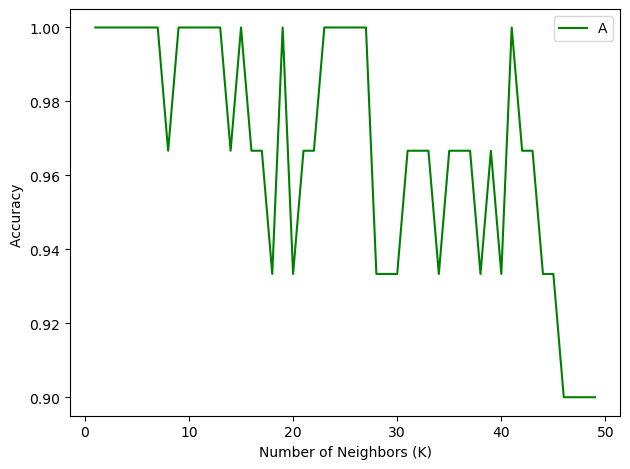

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.legend(('Accuracy '))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 1.0 with k= 1


Doing the same with the normalized data

In [ ]:
knnmodel1.fit(Xn_train,yn_train)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
knnmodel2.fit(Xn_train,yn_train)

KNeighborsClassifier()

In [ ]:
knnmodel3.fit(Xn_train,yn_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
yn_predict1=knnmodel1.predict(Xn_test)

In [ ]:
yn_predict2=knnmodel2.predict(Xn_test)

In [ ]:
yn_predict3=knnmodel3.predict(Xn_test)

In [ ]:
accuracy_score(yn_test,yn_predict1)

1.0

In [ ]:
accuracy_score(yn_test,yn_predict2)

1.0

In [ ]:
accuracy_score(yn_test,yn_predict3)

1.0

Building KNN from scratch

In [ ]:
#helper euclidean distance function
def euclidean(x1, x2):
    distance = np.sqrt(np.sum((x1-x2)**2))
    return distance

In [ ]:
from collections import Counter

class KNN:
    def __init__(self, k = 3):
      self.k = k

    def fit(self, X, y):
      self.X_train = X
      self.y_train = y

    def predict(self, X):
      predictions = [self._predict(x) for x in X]
      return predictions

    def _predict(self, x):
      # compute the distance
      distances = [euclidean(x, x_train) for x_train in self.X_train]

      # get the closest k
      k_indices = np.argsort(distances)[:self.k]
      k_nearest_labels = [self.y_train[i] for i in k_indices]

      # majority type
      most_common = Counter(k_nearest_labels).most_common()
      return most_common[0][0]

In [ ]:
#un-normalized data for k = 3
knn_classifier1 = KNN(k=3)
knn_classifier1.fit(X_train, y_train)
predictions1 = knn_classifier1.predict(X_test)
print(predictions1)

[1.0, 0.0, 2.0, 1.0, 1.0, 0.0, 1.0, 2.0, 1.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 1.0, 1.0, 2.0, 0.0, 2.0, 0.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.0, 0.0]


In [ ]:
#normalized data for k = 3
knn_classifier1.fit(Xn_train, yn_train)
predictions1n = knn_classifier1.predict(Xn_test)
print(predictions1n)

[1.0, 0.0, 2.0, 1.0, 1.0, 0.0, 1.0, 2.0, 1.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 1.0, 1.0, 2.0, 0.0, 2.0, 0.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.0, 0.0]


In [ ]:
#un-normalized data for k = 5
knn_classifier2 = KNN(k=5)
knn_classifier2.fit(X_train, y_train)
predictions2 = knn_classifier2.predict(X_test)
print(predictions2)

[1.0, 0.0, 2.0, 1.0, 1.0, 0.0, 1.0, 2.0, 1.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 1.0, 1.0, 2.0, 0.0, 2.0, 0.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.0, 0.0]


In [ ]:
#normalized data for k = 5
knn_classifier2.fit(Xn_train, yn_train)
predictions2n = knn_classifier2.predict(Xn_test)
print(predictions2n)

[1.0, 0.0, 2.0, 1.0, 1.0, 0.0, 1.0, 2.0, 1.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 1.0, 1.0, 2.0, 0.0, 2.0, 0.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.0, 0.0]


In [ ]:
#un-normalized data for k = 7
knn_classifier3 = KNN(k=5)
knn_classifier3.fit(X_train, y_train)
predictions3 = knn_classifier3.predict(X_test)
print(predictions3)

[1.0, 0.0, 2.0, 1.0, 1.0, 0.0, 1.0, 2.0, 1.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 1.0, 1.0, 2.0, 0.0, 2.0, 0.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.0, 0.0]


In [ ]:
#normalized data for k = 7
knn_classifier3.fit(Xn_train, yn_train)
predictions3n = knn_classifier3.predict(Xn_test)
print(predictions3n)

[1.0, 0.0, 2.0, 1.0, 1.0, 0.0, 1.0, 2.0, 1.0, 1.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 2.0, 1.0, 1.0, 2.0, 0.0, 2.0, 0.0, 2.0, 2.0, 2.0, 2.0, 2.0, 0.0, 0.0]


In [ ]:
#accuracy for normalized data case I
accuracy1n = np.sum(predictions1n == yn_test) / len(yn_test)
print(accuracy1n)

1.0


In [ ]:
#accuracy for normalized data case II
accuracy2n = np.sum(predictions2n == yn_test) / len(yn_test)
print(accuracy2n)

1.0


In [ ]:
#accuracy for normalized data case III
accuracy3n = np.sum(predictions3n == yn_test) / len(yn_test)
print(accuracy3n)

1.0


Output Visualization for the built-from-scratch KNN

In [ ]:
prediction_output1n=pd.DataFrame(data=[yn_test.data,predictions1n],index=['y_test','predictions1n'])
prediction_output1n.transpose()

,y_test,predictions1n
0,1.0,1.0
1,0.0,0.0
2,2.0,2.0
3,1.0,1.0
4,1.0,1.0
5,0.0,0.0
6,1.0,1.0
7,2.0,2.0
8,1.0,1.0
9,1.0,1.0


In [ ]:
prediction_output2n=pd.DataFrame(data=[yn_test.data,predictions2n],index=['y_test','predictions2n'])
prediction_output2n.transpose()

,y_test,predictions2n
0,1.0,1.0
1,0.0,0.0
2,2.0,2.0
3,1.0,1.0
4,1.0,1.0
5,0.0,0.0
6,1.0,1.0
7,2.0,2.0
8,1.0,1.0
9,1.0,1.0


In [ ]:
prediction_output3n=pd.DataFrame(data=[yn_test.data,predictions3n],index=['y_test','predictions3n'])
prediction_output3n.transpose()

,y_test,predictions3n
0,1.0,1.0
1,0.0,0.0
2,2.0,2.0
3,1.0,1.0
4,1.0,1.0
5,0.0,0.0
6,1.0,1.0
7,2.0,2.0
8,1.0,1.0
9,1.0,1.0


Finding the best K value for the built-from-scratch KNN

In [ ]:
Ks=50
mean_acc=np.zeros((Ks-1))


#train and predict
for n in range(1,Ks):
    classifier = KNN(k=n)
    classifier.fit(Xn_train,yn_train)
    yhat = classifier.predict(Xn_test)
    mean_acc[n-1]=accuracy_score(yn_test,yhat)

In [ ]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1)

The best accuracy was with 1.0 with k= 1


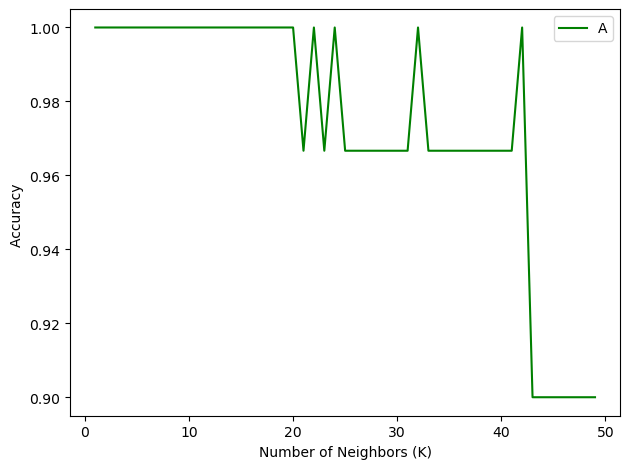

In [ ]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.legend(('Accuracy '))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

Checking if the output of the KNNClassifier is the same as the other KNN

In [ ]:
print(predictions1 == y_predict1)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True]
